# Bernstein-Vazirani Algorithm

The Bernstein-Vazirani algorithm allows us to determine a secret number stored inside a box. Mathematically, the problem statement that we are solving is the following:

Consider a hidden Boolean function $f$ which takes in a string of $n$ bits $\{x_0, x_1, \ldots x_{n-1}\}$ and returns 1 for only a unique n-bit string $s = \{s_0, s_1, \ldots s_{n-1}\}$ and 0 otherwise.

How many attempts do we need to make in order to find the secret number $s$?

**To find this secret number a Classical Computer after clever thinking will take $n$ attempts.
But a Quantum Computer can find this secrect number in $one$ attempt.**

The Bernstein-Vazirani Algorithm is an example of many quantum algorithms, where a quantum computer outperforms a classical computer.

## Algorithm:

1. Initialize the first $n$ qubits in the state $\vert0\rangle$, and the last qubit in the $\vert1\rangle$ state. In Qiskit, all qubits are initialized in the $\vert0\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to $\vert1\rangle$ state by applying an $X$ gate.

2. Apply Hadamard gates to all qubits.

3. Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1.

4. Measure the first $n$ qubits in the Bell basis. This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline

In [2]:
# we decide on a secret number.
secretNumber = '1100'

In [3]:
n = len(secretNumber)

# The algorithm requires n+1 qubits and n classical bits, where n is the length of the secret number.

circuit = QuantumCircuit(n+1, n);

### **1. Initialize all qubits as state $\vert0\rangle$, and the last qubit as the $\vert1\rangle$ state**

In [4]:
circuit.x(n)    # the n+1 qubits are indexed 0...n, so the last qubit is index n.
circuit.barrier()
circuit.draw()

░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
q_3: ──────░─
     ┌───┐ ░ 
q_4: ┤ X ├─░─
     └───┘ ░ 
c: 4/════════

### **2. Apply H-gates to all qubits.**

In [5]:
circuit.h(range(n+1))   # range(n+1) returns [0,1,2,...,n] in Python. This will cover all the qubits.
circuit.barrier()
circuit.draw()

░ ┌───┐ ░ 
q_0: ──────░─┤ H ├─░─
           ░ ├───┤ ░ 
q_1: ──────░─┤ H ├─░─
           ░ ├───┤ ░ 
q_2: ──────░─┤ H ├─░─
           ░ ├───┤ ░ 
q_3: ──────░─┤ H ├─░─
     ┌───┐ ░ ├───┤ ░ 
q_4: ┤ X ├─░─┤ H ├─░─
     └───┘ ░ └───┘ ░ 
c: 4/════════════════

### **3. Oracle**

In [6]:
for qubit_index, bit_0_or_1 in enumerate(reversed(secretNumber)):
    if bit_0_or_1 == '1':
        circuit.cx(qubit_index, n)

circuit.barrier()

### **4.Measure first $n$ qubits on Bell basis**

This means first applying H-gate to all qubits and then applying measure-gates to first $n$ qubits.

In [7]:
circuit.h(range(n+1))   # range(n+1) returns [0,1,2,...,n] in Python, this will cover all the qubits.
circuit.barrier()

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the cbits indexed 0 to n-1.

In [8]:
circuit.draw()

░ ┌───┐ ░            ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░────────────░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░            ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░────────────░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░            ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░───■────────░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░───┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ ├───┤ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░─┤ H ├─░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░ └───┘ ░  ║  ║  ║  ║ 
c: 4/══════════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3

**EXECUTING CIRCUIT ON SIMULATOR.**

We'll set the number of shots to 1. Since this algo. can find the secret numnber in one attempt.

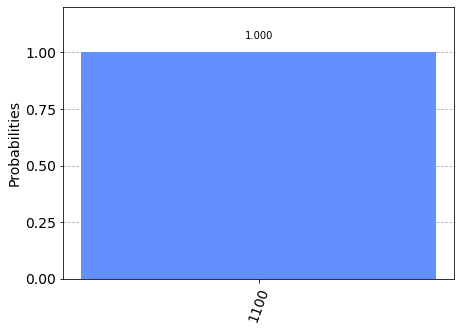

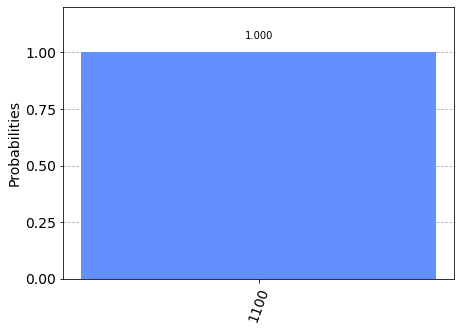

In [9]:
shots = 1

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=shots).result()

plot_histogram(result.get_counts(circuit))

Even if we set the number of shots to 1000, we will still get all of the results as the secret number.

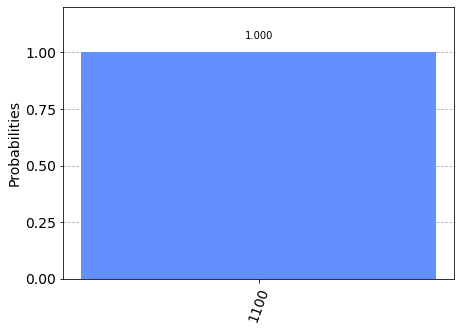

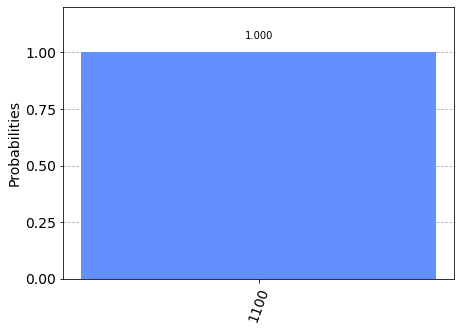

In [10]:
shots = 1000

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=shots).result()

plot_histogram(result.get_counts(circuit))

**EXECUTING CIRCUIT ON QUANTUM COMPUTER.**

Job Status: job has successfully run
Result: {'0000': 18, '0001': 21, '0010': 17, '0011': 22, '0100': 42, '0101': 16, '0110': 29, '0111': 31, '1000': 70, '1001': 21, '1010': 48, '1011': 38, '1100': 324, '1101': 44, '1110': 208, '1111': 51} 



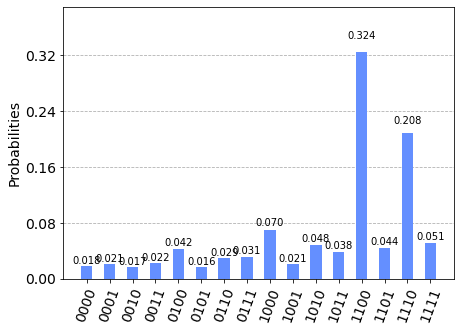

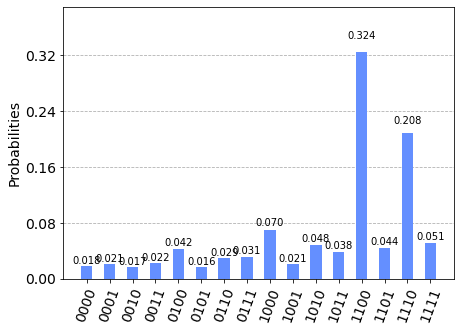

In [11]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmq_belem')

job = execute(circuit, backend=device, shots=1000)
job_monitor(job)

counts = job.result().get_counts()

print('Result:', counts, '\n')
plot_histogram(counts)